# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline 
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#quick view of the data set
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
#check total number of rows in the dataframe
len(df.index)

130

In [4]:
#check for null values
df.isnull().values.any()

False

# Q1

### Is the distribution of body temperatures normal?

In [5]:
#to check for normal distribution, normaltest's null hypothesis  is that the sample came from a normal distribution
#normaltest is based on D’Agostino and Pearson’s test
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Traditionally we would need p-values lower than 0.05 (the significance level) to reject the null hypothesis. In this case, we can't reject the null hypothesis that the sample is from a normal distribution.

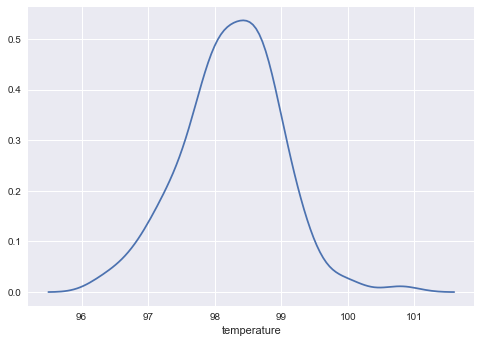

In [6]:
sns.distplot(df.temperature, hist=False)

# Answer to Q1

Based on the D’Agostino and Pearson’s test and looking at the KDE(Kernel Density Estimation) the sample data set is close to being a NORMAL DISTRIBUTION.

# Q2

### Is the sample size large? Are the observations independent?

In [7]:
# z value for 95% confidence interval
z = 1.96
#standard deviation
std = np.std(df.temperature)
#margin of error
moe = .05

In [8]:
#formula for determining needed sample size
sample_size = np.square(z)*std*(1-std)/np.square(moe)
#compare needed sample size with our data's sample size
if len(df.index) < sample_size:
    print("The sample size is not large enough for a 95% confidence interval and a margin of error of 5%." )

The sample size is not large enough for a 95% confidence interval and a margin of error of 5%.


# Answer to Q2

The sample size is NOT LARGE enough for a 95% confidence interval and a margin of error of 5%. Though it is not explicitly said that the sample is independent, WE CAN ASSUME IT IS INDEPENDENT based on the data sources provided above.

# Q3

### Is the true population mean really 98.6 degrees F?

In [9]:
#test for the null hypothesis that true population mean is 98.6
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

From this result, we can reject the null hypothesis that the true population mean is 98.6 F.

#### Would you use a one-sample or two-sample test? Why?

We would use a one-sample test as we are comparing the sample mean to the population mean. One-sample tests are used to compare a sample to a known value while two-sample tests are used to compare the means of two different samples.

#### In this situation, is it appropriate to use the  t or  z statistic?

In general, the t statistic is used with samples less than 30 and an unknown population standard deviation. Since, we do not know the population standard deviation, it is rational to use the t-test even with the large sample. Also, when n > 30 the t distribution is close to normal distribution.

#### Now try using the other test. How is the result be different? Why?

In [10]:
#ztest for null hypothesis that the true population mean is 98.6
from statsmodels.stats.weightstats import ztest
ztest(df.temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

After using the ztest, we still reject the null hypothesis that the true population mean is 98.6 F. The result isn't much different as the distribution becomes almost identical to a normal distribution when n > 30.

# Answer to Q3

The true population mean is unlikely to be 98.6 F.

# Q4

### At what temperature should we consider someone's temperature to be "abnormal"?

In [13]:
#95% confidence interval of what should be considered normal
stats.norm.interval(.95, loc=df.temperature.mean(), scale=std)

(96.81775582674824, 99.680705711713316)

# Answer to Q4

We should consider someone's temperature to be "abnormal" when it is outside of these limits.

# Q5

### Is there a significant difference between males and females in normal temperature?
- Write a story with your conclusion in the context of the original problem.

In [14]:
#separate data according to gender
male = df[df.gender == 'M'].temperature
female = df[df.gender == 'F'].temperature

In [15]:
#two sample test for the null hypothesis that male and female samples have identical average
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

There is a significant differece between male and females in normal temperature.

#### What test did you use and why?

A two sample test was done because we wanted to compare the means of two different samples.

# Answer to Q5

There is a significant differece between male and females in normal temperature.